In [9]:
import os
import time
import datetime
import re
import json
import pickle
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_squared_error, r2_score


# Algorithms 

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor, GradientBoostingRegressor
import xgboost

from scipy.stats import boxcox, shapiro, kstest, normaltest, skew
# import statsmodels.api as sm
# from scipy import mode
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Problem statement ==========================================

In [ ]:
Source.Name
web-scraper-order
web-scraper-start-url
full_name
selling_price
new-price
year
seller_type
km_driven
owner_type
fuel_type
transmission_type
mileage
engine
max_power
seats

# 2) Data Gathering =============================================

In [10]:
df = pd.read_csv('Cardekho_Extract.csv')

In [11]:
df = df.drop(['Source.Name', 'web-scraper-order', 'web-scraper-start-url'], axis = 1)

In [12]:
# df

# 3) Exploratory Data Analysis ====================================

#### 1) full_name

In [13]:
df.isna().sum()

full_name               46
selling_price           46
new-price            10460
year                    46
seller_type             46
km_driven               46
owner_type              46
fuel_type               46
transmission_type       46
mileage                 46
engine                 105
max_power              105
seats                  173
dtype: int64

<AxesSubplot: xlabel='full_name', ylabel='count'>

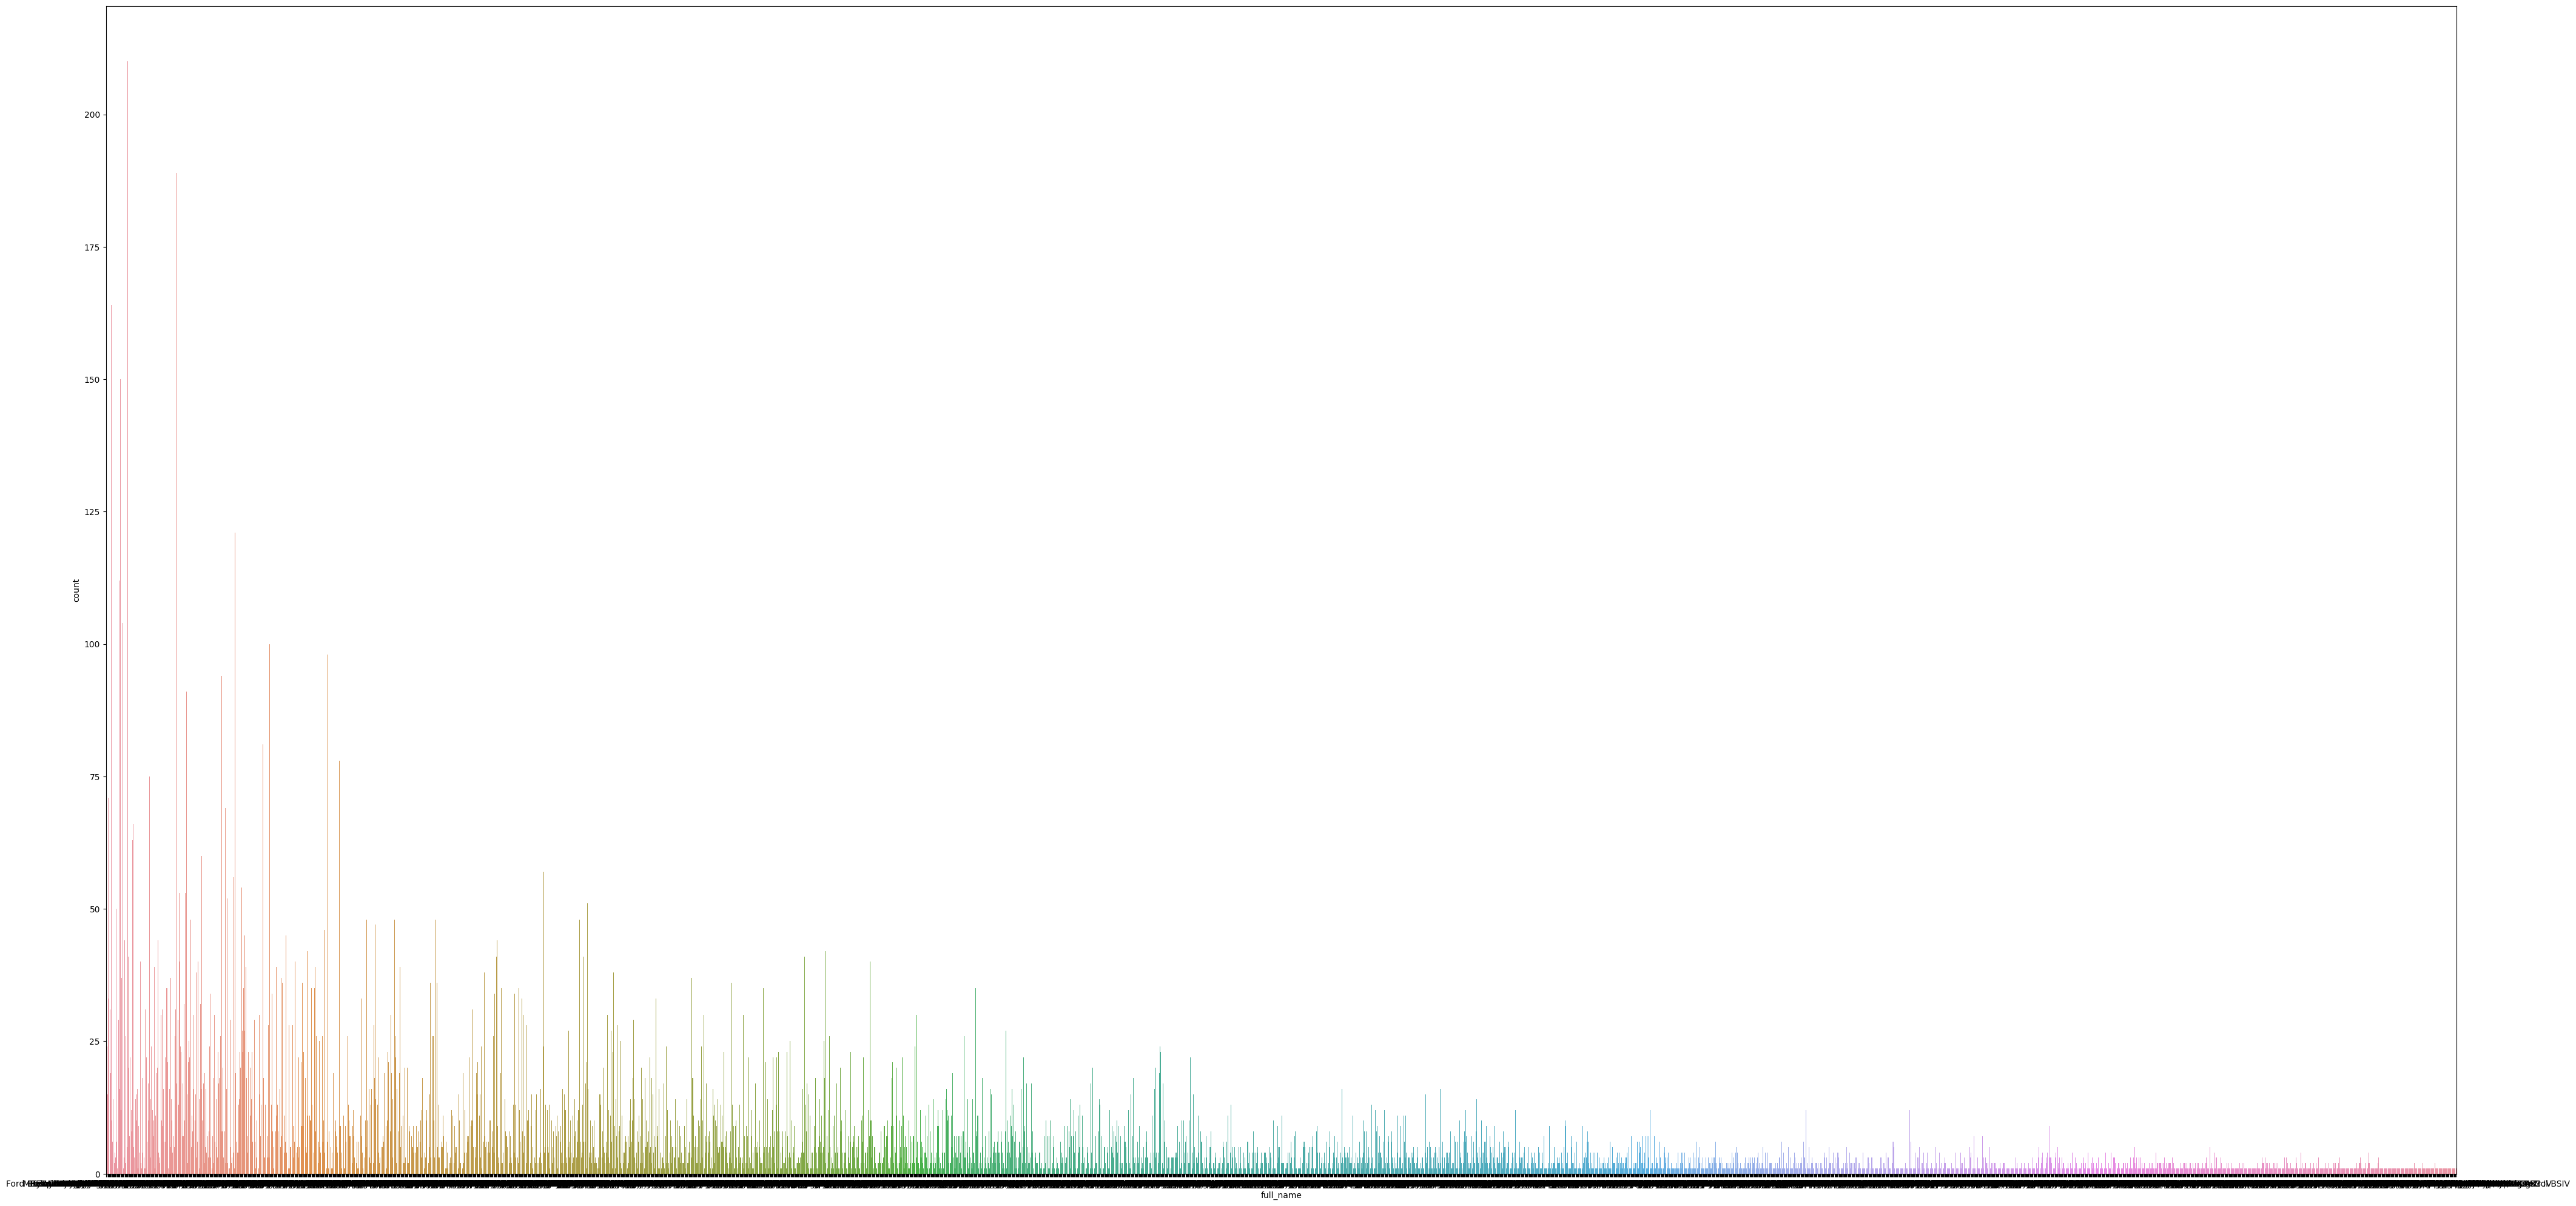

In [16]:
plt.figure(figsize= (50, 25))
sns.countplot(x = df['full_name'])

In [7]:
df['full_name'].replace({np.nan : df['full_name'].mode()[0]}, inplace= True)

In [8]:
df['full_name']

0                                       Maruti Alto Std
1                                Hyundai Grand i10 Asta
2                                      Hyundai i20 Asta
3                         Maruti Alto K10 2010-2014 VXI
4        Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV
                              ...                      
20021                     Toyota Platinum Etios 1.4 GXD
20022                            Maruti Ertiga BSIV VXI
20023                      Skoda Rapid 1.5 TDI Elegance
20024                            Mahindra XUV500 W6 2WD
20025                          Honda City i-VTEC CVT VX
Name: full_name, Length: 20026, dtype: object

In [117]:
df['full_name'] = df['full_name'].str.split(" ").str.slice(0,3).str.join(" ")

In [118]:
df['full_name'].isna().sum()

0

#### 2) brand_name

In [119]:
brand_list = []

for brand in df['full_name'].iteritems():
    value = brand[1]
    full_list = value.split(" ")
    brand_list.append(full_list[0])

# brand_list

In [120]:
df.insert(1, 'brand_name', brand_list)

In [121]:
df

,full_name,brand_name,selling_price,new-price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,Maruti,1.2 Lakh*,NaN,2012.0,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,Hyundai Grand i10,Hyundai,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016.0,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,Hyundai i20 Asta,Hyundai,2.15 Lakh*,NaN,2010.0,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,Maruti Alto K10,Maruti,2.26 Lakh*,NaN,2012.0,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,Ford Ecosport 2015-2021,Ford,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015.0,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20021,Toyota Platinum Etios,Toyota,6.5 Lakh*,NaN,2017.0,Dealer,"69,480 kms",First Owner,Diesel,Manual,Mileage23.59 kmpl,Engine1364 CC,Max Power67.05 bhp,Seats5
20022,Maruti Ertiga BSIV,Maruti,9.25 Lakh*,NaN,2019.0,Dealer,"18,000 kms",First Owner,Petrol,Manual,Mileage17.5 kmpl,Engine1373 CC,Max Power91.1 bhp,Seats7
20023,Skoda Rapid 1.5,Skoda,4.25 Lakh*,NaN,2015.0,Dealer,"67,000 kms",First Owner,Diesel,Manual,Mileage21.14 kmpl,Engine1498 CC,Max Power103.52 bhp,Seats5
20024,Mahindra XUV500 W6,Mahindra,12.25 Lakh*,New Car (On-Road Price) : Rs.17.83-24.91 Lakh*,2016.0,Dealer,"38,00,000 kms",First Owner,Diesel,Manual,Mileage16.0 kmpl,Engine2179 CC,Max Power140 bhp,Seats7


#### 3) model

In [122]:
model_list = []

for model in df['full_name'].iteritems():
    index = model[1].find(' ')
    model_list.append(model[1][index + 1:])
# model_list

In [123]:
df.insert(2, 'model', model_list)

In [124]:
df

,full_name,brand_name,model,selling_price,new-price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,Maruti,Alto Std,1.2 Lakh*,NaN,2012.0,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,Hyundai Grand i10,Hyundai,Grand i10,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016.0,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,Hyundai i20 Asta,Hyundai,i20 Asta,2.15 Lakh*,NaN,2010.0,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,Maruti Alto K10,Maruti,Alto K10,2.26 Lakh*,NaN,2012.0,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,Ford Ecosport 2015-2021,Ford,Ecosport 2015-2021,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015.0,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20021,Toyota Platinum Etios,Toyota,Platinum Etios,6.5 Lakh*,NaN,2017.0,Dealer,"69,480 kms",First Owner,Diesel,Manual,Mileage23.59 kmpl,Engine1364 CC,Max Power67.05 bhp,Seats5
20022,Maruti Ertiga BSIV,Maruti,Ertiga BSIV,9.25 Lakh*,NaN,2019.0,Dealer,"18,000 kms",First Owner,Petrol,Manual,Mileage17.5 kmpl,Engine1373 CC,Max Power91.1 bhp,Seats7
20023,Skoda Rapid 1.5,Skoda,Rapid 1.5,4.25 Lakh*,NaN,2015.0,Dealer,"67,000 kms",First Owner,Diesel,Manual,Mileage21.14 kmpl,Engine1498 CC,Max Power103.52 bhp,Seats5
20024,Mahindra XUV500 W6,Mahindra,XUV500 W6,12.25 Lakh*,New Car (On-Road Price) : Rs.17.83-24.91 Lakh*,2016.0,Dealer,"38,00,000 kms",First Owner,Diesel,Manual,Mileage16.0 kmpl,Engine2179 CC,Max Power140 bhp,Seats7


#### 4) selling_price

In [125]:
df['selling_price'].replace({np.nan: df['selling_price'].mode()[0]}, inplace = True)

In [126]:
# df['selling_price']

In [127]:
def get_value(x):
    if ' Lakh*' in x:
        data1 = eval(x.replace(" Lakh*", ''))
        data1 = data1 * 100000
        return data1
    
    elif " Cr*" in x:
        data1 = eval(x.replace(" Cr*", ''))
        data1 = data1 * 10000000
        return data1
    
    elif "*" in x and ',' in x:
        data1 = eval(x.replace("*", '').replace(",", ''))
        return data1

In [128]:
df['selling_price'] = df['selling_price'].apply(get_value)

In [129]:
df['selling_price'].isna().sum()

0

In [130]:
df

,full_name,brand_name,model,selling_price,new-price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,Maruti,Alto Std,120000.0,NaN,2012.0,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,Hyundai Grand i10,Hyundai,Grand i10,550000.0,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016.0,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,Hyundai i20 Asta,Hyundai,i20 Asta,215000.0,NaN,2010.0,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,Maruti Alto K10,Maruti,Alto K10,226000.0,NaN,2012.0,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,Ford Ecosport 2015-2021,Ford,Ecosport 2015-2021,570000.0,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015.0,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20021,Toyota Platinum Etios,Toyota,Platinum Etios,650000.0,NaN,2017.0,Dealer,"69,480 kms",First Owner,Diesel,Manual,Mileage23.59 kmpl,Engine1364 CC,Max Power67.05 bhp,Seats5
20022,Maruti Ertiga BSIV,Maruti,Ertiga BSIV,925000.0,NaN,2019.0,Dealer,"18,000 kms",First Owner,Petrol,Manual,Mileage17.5 kmpl,Engine1373 CC,Max Power91.1 bhp,Seats7
20023,Skoda Rapid 1.5,Skoda,Rapid 1.5,425000.0,NaN,2015.0,Dealer,"67,000 kms",First Owner,Diesel,Manual,Mileage21.14 kmpl,Engine1498 CC,Max Power103.52 bhp,Seats5
20024,Mahindra XUV500 W6,Mahindra,XUV500 W6,1225000.0,New Car (On-Road Price) : Rs.17.83-24.91 Lakh*,2016.0,Dealer,"38,00,000 kms",First Owner,Diesel,Manual,Mileage16.0 kmpl,Engine2179 CC,Max Power140 bhp,Seats7


In [131]:
# df['selling_price'].describe()

In [132]:
# df['selling_price'] = boxcox(df['selling_price'])[0]

In [133]:
# sns.kdeplot(df['selling_price'])

In [134]:
# df = df[df["selling_price"]<10000000]

#### 5) new-price

In [135]:
df.rename(columns= {'new-price': "new_price"},inplace= True)

In [136]:
empty_list_index = list(df.loc[df['new_price'].isin([np.nan])].index)
# empty_list_index

In [137]:
filled_values = []
for i in df['new_price'].iteritems():
    if i[1] is np.nan:
        pass
    else:
        index = np.where(df['new_price'] == i[1])[0]
        filled_values.extend(index)

In [138]:
non_empty_rows_index = set(filled_values)
non_empty_rows_index =list(non_empty_rows_index)
# non_empty_rows_index

In [139]:
df

,full_name,brand_name,model,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,Maruti,Alto Std,120000.0,NaN,2012.0,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,Hyundai Grand i10,Hyundai,Grand i10,550000.0,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016.0,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,Hyundai i20 Asta,Hyundai,i20 Asta,215000.0,NaN,2010.0,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,Maruti Alto K10,Maruti,Alto K10,226000.0,NaN,2012.0,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,Ford Ecosport 2015-2021,Ford,Ecosport 2015-2021,570000.0,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015.0,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20021,Toyota Platinum Etios,Toyota,Platinum Etios,650000.0,NaN,2017.0,Dealer,"69,480 kms",First Owner,Diesel,Manual,Mileage23.59 kmpl,Engine1364 CC,Max Power67.05 bhp,Seats5
20022,Maruti Ertiga BSIV,Maruti,Ertiga BSIV,925000.0,NaN,2019.0,Dealer,"18,000 kms",First Owner,Petrol,Manual,Mileage17.5 kmpl,Engine1373 CC,Max Power91.1 bhp,Seats7
20023,Skoda Rapid 1.5,Skoda,Rapid 1.5,425000.0,NaN,2015.0,Dealer,"67,000 kms",First Owner,Diesel,Manual,Mileage21.14 kmpl,Engine1498 CC,Max Power103.52 bhp,Seats5
20024,Mahindra XUV500 W6,Mahindra,XUV500 W6,1225000.0,New Car (On-Road Price) : Rs.17.83-24.91 Lakh*,2016.0,Dealer,"38,00,000 kms",First Owner,Diesel,Manual,Mileage16.0 kmpl,Engine2179 CC,Max Power140 bhp,Seats7


#### 6) min_price

In [140]:
df.insert(3, 'min_price', value= np.nan)

In [144]:
# df

#### 7) max_price

In [142]:
df.insert(4, 'max_price', value= np.nan)

In [143]:
for row in df['min_price'].iteritems():
    for i in range(len(non_empty_rows_index)):
        
        if row[0] == non_empty_rows_index[i]:
            value = df.loc[row[0] ,'new_price']
#             print(value)
            
            if "Cr-" in value and "Cr*" in value:
                ext_value = re.findall("[0-9][0-9.]{1,2}[0-9]{2}", value)
#                 print(ext_value)
                df.loc[row[0], 'min_price'] = float(ext_value[0])* 10000000
                df.loc[row[0], 'max_price'] = float(ext_value[1])* 10000000
            
            elif "Cr*" in value and not "Cr-" in value:
                ext_value1 = re.findall("[0-9][0-9.]{1,2}[0-9]{2}", value)
#                 print(ext_value1)
                if len(ext_value1) == 2:
                    df.loc[row[0], 'min_price'] = float(ext_value1[0])* 100000
                    df.loc[row[0], 'max_price'] = float(ext_value1[1])* 10000000
                else:
                    df.loc[row[0], 'min_price'] = float(ext_value1[0])* 10000000
                    df.loc[row[0], 'max_price'] = float(ext_value1[0])* 10000000
                    
            elif "Lakh*" in value:
                ext_value2 = re.findall("[0-9][0-9.]{1,2}[0-9]{2}", value)
#                 print(ext_value2)
                if len(ext_value2) == 2:
                    df.loc[row[0], 'min_price'] = float(ext_value2[0])* 100000
                    df.loc[row[0], 'max_price'] = float(ext_value2[1])* 100000
                else:
                    df.loc[row[0], 'min_price'] = float(ext_value2[0])* 100000
                    df.loc[row[0], 'max_price'] = float(ext_value2[0])* 100000
            else:
                pass
        else:
            pass

In [145]:
df = df.drop('new_price', axis = 1)

In [146]:
df

,full_name,brand_name,model,min_price,max_price,selling_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,Maruti,Alto Std,NaN,NaN,120000.0,2012.0,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,Hyundai Grand i10,Hyundai,Grand i10,711000.0,748000.0,550000.0,2016.0,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,Hyundai i20 Asta,Hyundai,i20 Asta,NaN,NaN,215000.0,2010.0,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,Maruti Alto K10,Maruti,Alto K10,NaN,NaN,226000.0,2012.0,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,Ford Ecosport 2015-2021,Ford,Ecosport 2015-2021,1014000.0,1379000.0,570000.0,2015.0,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20021,Toyota Platinum Etios,Toyota,Platinum Etios,NaN,NaN,650000.0,2017.0,Dealer,"69,480 kms",First Owner,Diesel,Manual,Mileage23.59 kmpl,Engine1364 CC,Max Power67.05 bhp,Seats5
20022,Maruti Ertiga BSIV,Maruti,Ertiga BSIV,NaN,NaN,925000.0,2019.0,Dealer,"18,000 kms",First Owner,Petrol,Manual,Mileage17.5 kmpl,Engine1373 CC,Max Power91.1 bhp,Seats7
20023,Skoda Rapid 1.5,Skoda,Rapid 1.5,NaN,NaN,425000.0,2015.0,Dealer,"67,000 kms",First Owner,Diesel,Manual,Mileage21.14 kmpl,Engine1498 CC,Max Power103.52 bhp,Seats5
20024,Mahindra XUV500 W6,Mahindra,XUV500 W6,1783000.0,2491000.0,1225000.0,2016.0,Dealer,"38,00,000 kms",First Owner,Diesel,Manual,Mileage16.0 kmpl,Engine2179 CC,Max Power140 bhp,Seats7


#### 8) year

In [147]:
df['year'].replace({np.nan : df['year'].mode()[0]}, inplace= True)

In [148]:
df['year'] = df['year'].astype(int)

#### 9) seller_type

In [149]:
df['seller_type']

0        Individual
1        Individual
2        Individual
3        Individual
4            Dealer
            ...    
20021        Dealer
20022        Dealer
20023        Dealer
20024        Dealer
20025        Dealer
Name: seller_type, Length: 20026, dtype: object

In [150]:
df['seller_type'].value_counts().to_dict()

{'Dealer': 11973, 'Individual': 7817, 'Trustmark Dealer': 190}

In [152]:
df['seller_type'].replace({'Dealer': 1, 'Individual': 2, 'Trustmark Dealer': 3}, inplace= True)

In [151]:
df['seller_type'].replace({np.nan: df['seller_type'].mode()[0]}, inplace= True)

#### 10) km_driven

In [153]:
df['km_driven']

0         1,20,000 kms
1           20,000 kms
2           60,000 kms
3           37,000 kms
4           30,000 kms
             ...      
20021       69,480 kms
20022       18,000 kms
20023       67,000 kms
20024    38,00,000 kms
20025       13,000 kms
Name: km_driven, Length: 20026, dtype: object

In [154]:
df['km_driven'].replace({np.nan : df['km_driven'].mode()[0]}, inplace = True)

In [155]:
def convert_int(value):
    new = re.sub("[^0-9]", "", value)
    return int(new)

value1 = convert_int("38,00,000 kms")
print(value1, type(value1))

3800000 <class 'int'>


In [156]:
df['km_driven'] = df['km_driven'].apply(convert_int)

In [157]:
df['km_driven'].quantile(0.95)

120000.0

In [158]:
df

,full_name,brand_name,model,min_price,max_price,selling_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,Maruti,Alto Std,NaN,NaN,120000.0,2012,2,120000,First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,Hyundai Grand i10,Hyundai,Grand i10,711000.0,748000.0,550000.0,2016,2,20000,First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,Hyundai i20 Asta,Hyundai,i20 Asta,NaN,NaN,215000.0,2010,2,60000,First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,Maruti Alto K10,Maruti,Alto K10,NaN,NaN,226000.0,2012,2,37000,First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,Ford Ecosport 2015-2021,Ford,Ecosport 2015-2021,1014000.0,1379000.0,570000.0,2015,1,30000,First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20021,Toyota Platinum Etios,Toyota,Platinum Etios,NaN,NaN,650000.0,2017,1,69480,First Owner,Diesel,Manual,Mileage23.59 kmpl,Engine1364 CC,Max Power67.05 bhp,Seats5
20022,Maruti Ertiga BSIV,Maruti,Ertiga BSIV,NaN,NaN,925000.0,2019,1,18000,First Owner,Petrol,Manual,Mileage17.5 kmpl,Engine1373 CC,Max Power91.1 bhp,Seats7
20023,Skoda Rapid 1.5,Skoda,Rapid 1.5,NaN,NaN,425000.0,2015,1,67000,First Owner,Diesel,Manual,Mileage21.14 kmpl,Engine1498 CC,Max Power103.52 bhp,Seats5
20024,Mahindra XUV500 W6,Mahindra,XUV500 W6,1783000.0,2491000.0,1225000.0,2016,1,3800000,First Owner,Diesel,Manual,Mileage16.0 kmpl,Engine2179 CC,Max Power140 bhp,Seats7


#### 11) owner_type

In [159]:
df['owner_type'].value_counts().to_dict()

{'First Owner': 19974, 'Second Owner': 4, 'Third Owner': 2}

In [161]:
df['owner_type'].replace({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3}, inplace= True)

In [160]:
df['owner_type'].replace({np.nan : df['owner_type'].mode()[0]}, inplace= True)

#### 12) fuel_type

In [162]:
df['fuel_type'].value_counts().to_dict()

{'Diesel': 9817, 'Petrol': 9767, 'CNG': 316, 'LPG': 66, 'Electric': 14}

In [163]:
df['fuel_type'].replace({np.nan : df['fuel_type'].mode()[0]}, inplace= True)
df['fuel_type'].replace({'Diesel': 1, 'Petrol': 2, 'CNG': 3, 'LPG': 4, 'Electric': 5}, inplace= True)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20026 entries, 0 to 20025
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          20026 non-null  object 
 1   brand_name         20026 non-null  object 
 2   model              20026 non-null  object 
 3   min_price          9566 non-null   float64
 4   max_price          9566 non-null   float64
 5   selling_price      20026 non-null  float64
 6   year               20026 non-null  int32  
 7   seller_type        20026 non-null  int64  
 8   km_driven          20026 non-null  int64  
 9   owner_type         20026 non-null  int64  
 10  fuel_type          20026 non-null  int64  
 11  transmission_type  19980 non-null  object 
 12  mileage            19980 non-null  object 
 13  engine             19921 non-null  object 
 14  max_power          19921 non-null  object 
 15  seats              19853 non-null  object 
dtypes: float64(3), int32(1

#### 13) transmission_type

In [165]:
df['transmission_type'].value_counts().to_dict()

{'Manual': 16029, 'Automatic': 3951}

In [166]:
df['transmission_type'].replace({np.nan : df['transmission_type'].mode()[0]}, inplace= True)
df['transmission_type'].replace({'Manual': 0, 'Automatic': 1}, inplace= True)

In [167]:
# df.info()

#### 14) mileage

In [168]:
df['mileage']

0         Mileage19.7 kmpl
1         Mileage18.9 kmpl
2         Mileage17.0 kmpl
3        Mileage20.92 kmpl
4        Mileage22.77 kmpl
               ...        
20021    Mileage23.59 kmpl
20022     Mileage17.5 kmpl
20023    Mileage21.14 kmpl
20024     Mileage16.0 kmpl
20025     Mileage18.0 kmpl
Name: mileage, Length: 20026, dtype: object

In [169]:
df['mileage'].replace({np.nan : df['mileage'].mode()[0]}, inplace= True)

In [170]:
def get_mileage(value):
    new = re.sub("[^0-9.]", "", value)
    return float(new)

value1 = get_mileage('Mileage20.92 kmpl')
print(value1, type(value1))

20.92 <class 'float'>


In [171]:
df['mileage'] = df['mileage'].apply(get_mileage)

In [172]:
df['mileage']

0        19.70
1        18.90
2        17.00
3        20.92
4        22.77
         ...  
20021    23.59
20022    17.50
20023    21.14
20024    16.00
20025    18.00
Name: mileage, Length: 20026, dtype: float64

In [173]:
df['mileage'].quantile(0.9995)

33.54

In [174]:
# df = df.loc[(df['mileage']>= 4) | (df['mileage'] <= 33.55)]

In [175]:
# df.info()

#### 15) engine

In [176]:
df['engine']

0         Engine796 CC
1        Engine1197 CC
2        Engine1197 CC
3         Engine998 CC
4        Engine1498 CC
             ...      
20021    Engine1364 CC
20022    Engine1373 CC
20023    Engine1498 CC
20024    Engine2179 CC
20025    Engine1497 CC
Name: engine, Length: 20026, dtype: object

In [177]:
df['engine'].replace({np.nan : df['engine'].mode()[0]}, inplace= True)

In [178]:
df['engine'].replace({"Wheel Size17 x 7.5J" : df['engine'].mode()[0], 'Wheel SizeN/A': df['engine'].mode()[0],
                     'Engine CC': df['engine'].mode()[0], 'Engine0 CC' : df['engine'].mode()[0]}, inplace= True)

In [179]:
def get_engine_capacity(value):
    new = re.sub("[^0-9]", "", value)
    return int(new)

In [180]:
df['engine'] = df['engine'].apply(get_engine_capacity)

In [181]:
# sns.boxplot(x= df['engine'])

In [182]:
df['engine'].quantile(0.999)

4461.0

In [183]:
# df = df.loc[(df['engine']>= 796.0) | (df['mileage'] <= 5000)]

In [184]:
df

,full_name,brand_name,model,min_price,max_price,selling_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,Maruti,Alto Std,NaN,NaN,120000.0,2012,2,120000,1,2,0,19.70,796,Max Power46.3 bhp,Seats5
1,Hyundai Grand i10,Hyundai,Grand i10,711000.0,748000.0,550000.0,2016,2,20000,1,2,0,18.90,1197,Max Power82 bhp,Seats5
2,Hyundai i20 Asta,Hyundai,i20 Asta,NaN,NaN,215000.0,2010,2,60000,1,2,0,17.00,1197,Max Power80 bhp,Seats5
3,Maruti Alto K10,Maruti,Alto K10,NaN,NaN,226000.0,2012,2,37000,1,2,0,20.92,998,Max Power67.1 bhp,Seats5
4,Ford Ecosport 2015-2021,Ford,Ecosport 2015-2021,1014000.0,1379000.0,570000.0,2015,1,30000,1,1,0,22.77,1498,Max Power98.59 bhp,Seats5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20021,Toyota Platinum Etios,Toyota,Platinum Etios,NaN,NaN,650000.0,2017,1,69480,1,1,0,23.59,1364,Max Power67.05 bhp,Seats5
20022,Maruti Ertiga BSIV,Maruti,Ertiga BSIV,NaN,NaN,925000.0,2019,1,18000,1,2,0,17.50,1373,Max Power91.1 bhp,Seats7
20023,Skoda Rapid 1.5,Skoda,Rapid 1.5,NaN,NaN,425000.0,2015,1,67000,1,1,0,21.14,1498,Max Power103.52 bhp,Seats5
20024,Mahindra XUV500 W6,Mahindra,XUV500 W6,1783000.0,2491000.0,1225000.0,2016,1,3800000,1,1,0,16.00,2179,Max Power140 bhp,Seats7


#### 16) max_power

In [185]:
df['max_power']

0          Max Power46.3 bhp
1            Max Power82 bhp
2            Max Power80 bhp
3          Max Power67.1 bhp
4         Max Power98.59 bhp
                ...         
20021     Max Power67.05 bhp
20022      Max Power91.1 bhp
20023    Max Power103.52 bhp
20024       Max Power140 bhp
20025     Max Power117.6 bhp
Name: max_power, Length: 20026, dtype: object

In [186]:
df['max_power'].replace({"Seats5" : np.nan,
                        "Seats8": np.nan,
                        "SeatsN/A": np.nan}, inplace= True)
df['max_power'].replace({np.nan : df['max_power'].mode()[0]}, inplace= True)

In [187]:
df['max_power'].replace({'Max Powernull bhp': df['max_power'].mode()[0]}, inplace= True)

In [188]:
df['max_power'].replace({'Max Power bhp': df['max_power'].mode()[0]}, inplace= True)

In [189]:
def get_max_power(value):
    power = re.sub("[^0-9.]", "", value)
    return float(power)

p_value = get_max_power('Max Power46.3 bhp')
print(p_value)

46.3


In [190]:
df['max_power'] = df['max_power'].apply(get_max_power)

In [191]:
# sns.boxplot(x = df['max_power'])

In [192]:
df['max_power'].quantile(0.99)

258.0

In [193]:
# df = df.loc[(df['max_power'] > 55.3) |
#       (df['max_power'] < 400)]

#### 17) seats

In [194]:
df['seats'].value_counts().to_dict()

{'Seats5': 16553,
 'Seats7': 2370,
 'Seats8': 440,
 'Seats4': 225,
 'Seats6': 143,
 'Seats9': 72,
 'Seats10': 26,
 'Seats2': 21,
 'Seats14': 2,
 'SeatsN/A': 1}

In [195]:
# df = df.loc[(df['seats'] >= 2) |
#       (df['max_power'] <= 7)]

In [196]:
df['seats'].replace({np.nan: df['seats'].mode()[0],
                    'SeatsN/A': df['seats'].mode()[0]}, inplace= True)
def get_seats(value):
    seat = re.sub("[^0-9.]", "", value)
    return int(seat)

df['seats'] = df['seats'].apply(get_seats)

In [197]:
df

,full_name,brand_name,model,min_price,max_price,selling_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,Maruti,Alto Std,NaN,NaN,120000.0,2012,2,120000,1,2,0,19.70,796,46.30,5
1,Hyundai Grand i10,Hyundai,Grand i10,711000.0,748000.0,550000.0,2016,2,20000,1,2,0,18.90,1197,82.00,5
2,Hyundai i20 Asta,Hyundai,i20 Asta,NaN,NaN,215000.0,2010,2,60000,1,2,0,17.00,1197,80.00,5
3,Maruti Alto K10,Maruti,Alto K10,NaN,NaN,226000.0,2012,2,37000,1,2,0,20.92,998,67.10,5
4,Ford Ecosport 2015-2021,Ford,Ecosport 2015-2021,1014000.0,1379000.0,570000.0,2015,1,30000,1,1,0,22.77,1498,98.59,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20021,Toyota Platinum Etios,Toyota,Platinum Etios,NaN,NaN,650000.0,2017,1,69480,1,1,0,23.59,1364,67.05,5
20022,Maruti Ertiga BSIV,Maruti,Ertiga BSIV,NaN,NaN,925000.0,2019,1,18000,1,2,0,17.50,1373,91.10,7
20023,Skoda Rapid 1.5,Skoda,Rapid 1.5,NaN,NaN,425000.0,2015,1,67000,1,1,0,21.14,1498,103.52,5
20024,Mahindra XUV500 W6,Mahindra,XUV500 W6,1783000.0,2491000.0,1225000.0,2016,1,3800000,1,1,0,16.00,2179,140.00,7


# Creating new_df

In [226]:
new_df = df[~df['min_price'].isna()]

In [239]:
new_df = new_df[(new_df["selling_price"]<5000000) & (new_df["selling_price"]> 300000)
               & (new_df['km_driven'] > 5000.0) & (new_df['km_driven'] < 500000.0)
               & (new_df['mileage']>= 8) & (new_df['mileage'] <= 33.55)
               & (new_df['engine']>= 796.0) & (new_df['engine'] <= 2000)
               & (new_df['max_power'] > 55.3) & (new_df['max_power'] < 300)
               & (new_df['seats'] > 1) & (new_df['seats'] < 9)]

In [185]:
# new_df = new_df[(new_df['km_driven'] > 5000.0) & (new_df['km_driven'] < 800000.0)]

In [186]:
# new_df = new_df[(new_df['mileage']>= 8) & (new_df['mileage'] <= 33.55)]

In [187]:
# new_df = new_df[(new_df['engine']>= 796.0) & (new_df['engine'] <= 4000)]

In [188]:
# new_df = new_df[(new_df['max_power'] > 55.3) & (new_df['max_power'] < 400)]

In [189]:
# new_df = new_df[(new_df['seats'] > 1) & (new_df['seats'] < 9)]

In [199]:
df.to_csv('Cleaned_cardekho_data.csv')

In [201]:
df

,full_name,brand_name,model,min_price,max_price,selling_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,Maruti,Alto Std,NaN,NaN,120000.0,2012,2,120000,1,2,0,19.70,796,46.30,5
1,Hyundai Grand i10,Hyundai,Grand i10,711000.0,748000.0,550000.0,2016,2,20000,1,2,0,18.90,1197,82.00,5
2,Hyundai i20 Asta,Hyundai,i20 Asta,NaN,NaN,215000.0,2010,2,60000,1,2,0,17.00,1197,80.00,5
3,Maruti Alto K10,Maruti,Alto K10,NaN,NaN,226000.0,2012,2,37000,1,2,0,20.92,998,67.10,5
4,Ford Ecosport 2015-2021,Ford,Ecosport 2015-2021,1014000.0,1379000.0,570000.0,2015,1,30000,1,1,0,22.77,1498,98.59,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20021,Toyota Platinum Etios,Toyota,Platinum Etios,NaN,NaN,650000.0,2017,1,69480,1,1,0,23.59,1364,67.05,5
20022,Maruti Ertiga BSIV,Maruti,Ertiga BSIV,NaN,NaN,925000.0,2019,1,18000,1,2,0,17.50,1373,91.10,7
20023,Skoda Rapid 1.5,Skoda,Rapid 1.5,NaN,NaN,425000.0,2015,1,67000,1,1,0,21.14,1498,103.52,5
20024,Mahindra XUV500 W6,Mahindra,XUV500 W6,1783000.0,2491000.0,1225000.0,2016,1,3800000,1,1,0,16.00,2179,140.00,7


# Model Training

In [240]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [241]:
x = new_df.drop(["selling_price",'model'], axis = 1)
y = new_df["selling_price"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [242]:
## Creates object for one hot encoding on specified columns, which can be used for pipeline and column transformer

ohe = OneHotEncoder()
ohe.fit(x[["full_name", "brand_name", "seller_type", "owner_type", "fuel_type", "transmission_type"]])

OneHotEncoder()

In [243]:
ohe.categories_ ## Returns Unique values of each columns in array type

[array(['Audi A4 1.8', 'Audi A4 2.0', 'Audi A4 30', 'Audi A4 35',
        'Audi A6 35', 'BMW 3 Series', 'BMW 5 Series', 'BMW 6 Series',
        'BMW X1 sDrive', 'BMW X1 sDrive20d', 'BMW X1 xDrive',
        'BMW X3 2.0d', 'BMW X3 xDrive', 'BMW X3 xDrive20d', 'Datsun GO A',
        'Datsun GO Anniversary', 'Datsun GO D', 'Datsun GO Plus',
        'Datsun GO T', 'Datsun RediGO 1.0', 'Datsun RediGO AMT',
        'Datsun RediGO Gold', 'Datsun redi-GO 1.0', 'Ford Aspire 1.2',
        'Ford Aspire 1.5', 'Ford Aspire Titanium', 'Ford Ecosport 1.0',
        'Ford Ecosport 1.5', 'Ford Ecosport 2015-2021', 'Ford Figo 1.2',
        'Ford Figo 1.2P', 'Ford Figo 1.5', 'Ford Figo 1.5D',
        'Ford Figo 1.5P', 'Ford Figo Aspire', 'Ford Figo Diesel',
        'Ford Figo Petrol', 'Ford Freestyle Titanium',
        'Ford Freestyle Trend', 'Honda Amaze Ace',
        'Honda Amaze Anniversary', 'Honda Amaze E', 'Honda Amaze EX',
        'Honda Amaze Exclusive', 'Honda Amaze S', 'Honda Amaze SX',
        '

In [244]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),
                                        ["full_name", "brand_name", "seller_type", "owner_type", "fuel_type",
                                         "transmission_type"]), 
                                       remainder= "passthrough")
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories=[array(['Audi A4 1.8', 'Audi A4 2.0', 'Audi A4 30', 'Audi A4 35',
       'Audi A6 35', 'BMW 3 Series', 'BMW 5 Series', 'BMW 6 Series',
       'BMW X1 sDrive', 'BMW X1 sDrive20d', 'BMW X1 xDrive',
       'BMW X3 2.0d', 'BMW X3 xDrive', 'BMW X3 xDrive20d', 'Datsun GO A',
       'Datsun GO Anniversary', 'Datsun GO D', 'Datsun GO Plus'...
       'Mini', 'Nissan', 'Renault', 'Skoda', 'Tata', 'Toyota',
       'Volkswagen', 'Volvo'], dtype=object),
                                                           array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object),
                                                           array(['First Owner'], dtype=object),
                                                           array(['CNG', 'Diesel', 'Petrol'], dtype=object),
                                                           array(['Automatic', 'Manual'], dtype=object)]),
                                 ['full_name', 'brand_name', 'seller_type',
                                  'owner_type', 'fuel_type',
                                  'transmission_type'])])

In [245]:
lin_reg = LinearRegression()

In [246]:
lin_reg_pipe = make_pipeline(column_trans, lin_reg)
# lin_reg_pipe

In [247]:
lin_reg_pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A4 1.8', 'Audi A4 2.0', 'Audi A4 30', 'Audi A4 35',
       'Audi A6 35', 'BMW 3 Series', 'BMW 5 Series', 'BMW 6 Series',
       'BMW X1 sDrive', 'BMW X1 sDrive20d', 'BMW X1 xDrive',
       'BMW X3 2.0d', 'BMW X3 xDrive', 'BMW X3 xDrive20d', 'Datsun GO A',
       'Datsun GO An...
       'Volkswagen', 'Volvo'], dtype=object),
                                                                            array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object),
                                                                            array(['First Owner'], dtype=object),
                                                                            array(['CNG', 'Diesel', 'Petrol'], dtype=object),
                                                                            array(['Automatic', 'Manual'], dtype=object)]),
                                                  ['full_name', 'brand_name',
                                                   'seller_type', 'owner_type',
                                                   'fuel_type',
                                                   'transmission_type'])])),
                ('linearregression', LinearRegression())])

In [248]:
lin_reg_pipe.score(x_train, y_train)

0.6357877244174972

In [249]:
score = []
for i in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    lin_reg = LinearRegression()
    lin_reg_pipe = make_pipeline(column_trans, lin_reg)
    lin_reg_pipe.fit(x_train, y_train)
    score.append(lin_reg_pipe.score(x_train, y_train))
    
np.argmax(score)

373

In [252]:
score[373]

0.6899072273055762

In [ ]:
with open("LinearRegressionModel.pkl", "wb") as f:
    pickle.dump(lin_reg_pipe, f)

In [ ]:
df['selling_price'] = boxcox(df['selling_price'])[0]

In [ ]:
def get_value(x):
    if ' Lakh*' in x:
        data1 = eval(x.replace(" Lakh*", ''))
        data1 = data1 * 100000
        return data1
    
    elif " Cr*" in x:
        data1 = eval(x.replace(" Cr*", ''))
        data1 = data1 * 10000000
        return data1
    
    elif "*" in x and ',' in x:
        data1 = eval(x.replace("*", '').replace(",", ''))
        return data1

In [ ]:
def cleaning(x):
    if (len(x) > 7 and '-' in x) or (len(x) > 7 and '-' in x and '.' in x and not 'Sq. Meter' in x and not 'Sq. Yards' in x):
        data= re.findall('\d{3,5}[\.\d{2}]*',x)
        mean = (float(data[0])+ float(data[1]))/2
        return float(mean)

    elif 'Sq. Meter' in x:
        data = re.sub('Sq. Meter', '', x)
        M_value = round(float(data) * 10.7639, 2)
        return float(M_value)

    elif 'Sq. Yards' in x:
        data = re.sub('Sq. Yards', '', x)
        Y_value = round(float(data) * 9, 2)
        return float(Y_value)
    
    elif 'Acres' in x:
        data = re.sub('Acres', '', x)
        A_value = round(float(data) * 43560, 2)
        return float(A_value)
    
    elif 'Grounds' in x:
        data = re.sub('Grounds', '', x)
        G_value = round(float(data) * 2400, 2)
        return float(G_value)

    else:
        return float(x)